<a href="https://colab.research.google.com/github/MartinSomsak00/MLF/blob/main/lab7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow import keras
from keras.models import Sequential
from keras.datasets import mnist
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score


from keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D
from keras.optimizers import SGD, Adagrad, Adam, AdamW
from keras.datasets import cifar10
from keras.utils import to_categorical


###################################
font = {'weight' : 'bold',
        'size'   : 12}

matplotlib.rc('font', **font)

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
def display_random_images(x_data: np.array, y_data: np.array, count: int = 10) -> None:
  index = np.array(len(x_data))
  selected_ind = np.random.choice(index, count)

  selected_img = x_data[selected_ind]
  selected_labels = y_data[selected_ind]
  concat_img = np.concatenate(selected_img, axis=1)

  plt.figure(figsize=(20,10))
  plt.imshow(concat_img, cmap="gray")

  for id_label, label in enumerate(selected_labels):
    plt.text(14 + 28*id_label, 28*(5/4), label)
  plt.axis('off')
  plt.show()

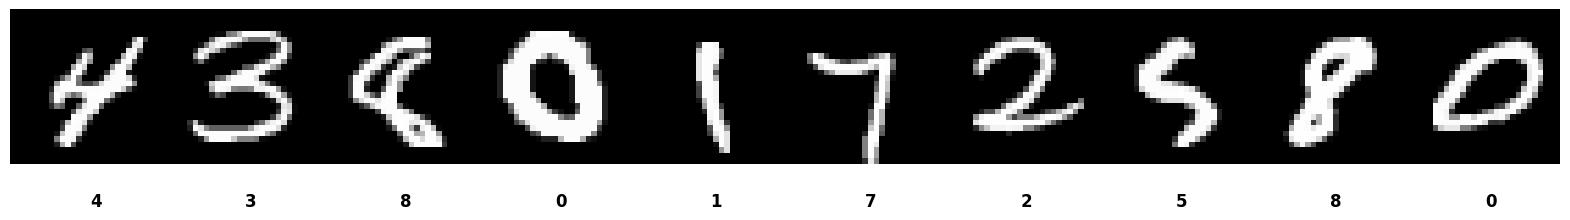

In [4]:
display_random_images(X_train, y_train)

In [5]:

###################################
# Write your own code here #
X_train_exp = np.expand_dims(X_train, -1)
X_train_scaled = X_train_exp.astype('float32') / 255.0
y_train_encoded = to_categorical(y_train, num_classes=10)
###################################

In [6]:
model = Sequential()
###################################
# Write your own code here #
model.add(Conv2D(16, (5, 5), activation='relu', input_shape=(28, 28, 1))) #(26, 26,64) #(28, 28, 1)
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
###################################

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
###################################
# Write your own code here #
loss = 'categorical_crossentropy'
metrics = 'accuracy'
learning_rate = 0.001
optimizer = AdamW(learning_rate = learning_rate)
model.compile(loss=loss, optimizer=optimizer, metrics=[metrics])
###################################
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 24, 24, 16)          │             416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 12, 12, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 10, 10, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 800)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │          25,632 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31,018 (121.16 KB)

 Trainable params: 31,018 (121.16 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
###################################
# Write your own code here #
history = model.fit(X_train_scaled, y_train_encoded, epochs=20, batch_size=32, validation_split = 0.2)
###################################

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9394 - loss: 0.1697 - val_accuracy: 0.9857 - val_loss: 0.0505
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9369 - loss: 0.1708 - val_accuracy: 0.9872 - val_loss: 0.0458
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9429 - loss: 0.1565 - val_accuracy: 0.9889 - val_loss: 0.0425
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9437 - loss: 0.1494 - val_accuracy: 0.9886 - val_loss: 0.0436
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9489 - loss: 0.1396 - val_accuracy: 0.9865 - val_loss: 0.0486
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9524 - loss: 0.1262 - val_accuracy: 0.9889 - val_loss: 0.0423
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9552 - loss: 0.1260 - val_accuracy: 0.9899 - val_loss: 0.0446
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9562 - loss: 0.1177 - 

In [15]:
X_test_exp = np.expand_dims(X_test, -1)
X_test_preprocessed = X_test_exp.astype('float32') / 255.0
y_test_encoded = to_categorical(y_test, num_classes=10)

In [23]:
###################################
score = model.evaluate(X_test_preprocessed, y_test_encoded, verbose=0)

print('Test loss:', score[0])
print(f'Test accuracy: {score[1]*100} %')



###################################

Test loss: 0.0393613800406456
Test accuracy: 99.11999702453613 %


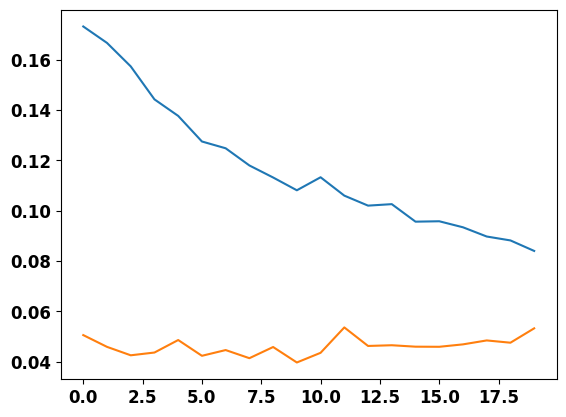

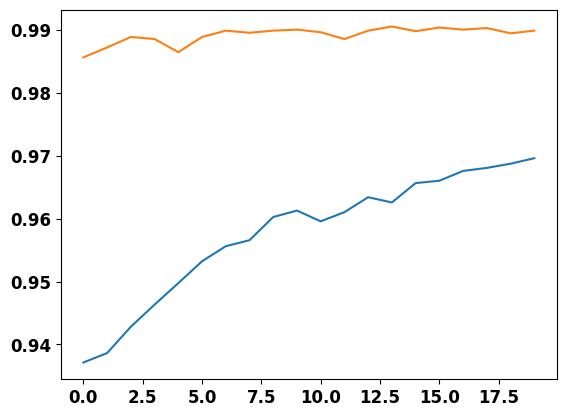

In [24]:
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

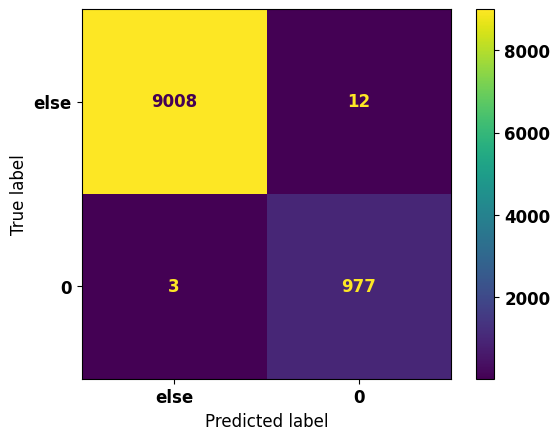

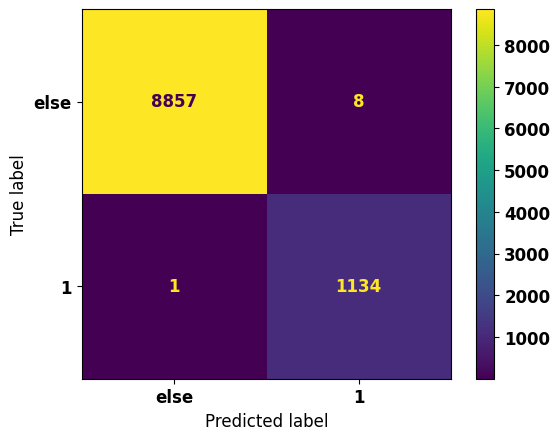

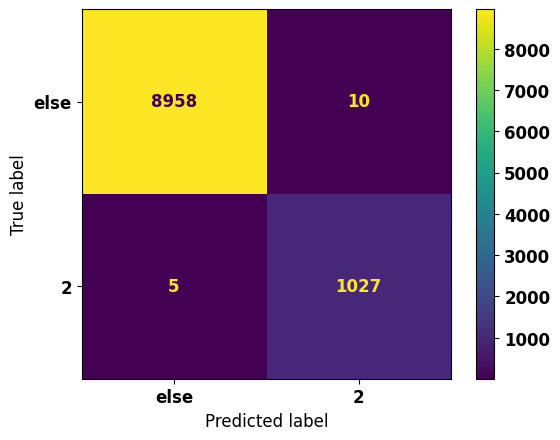

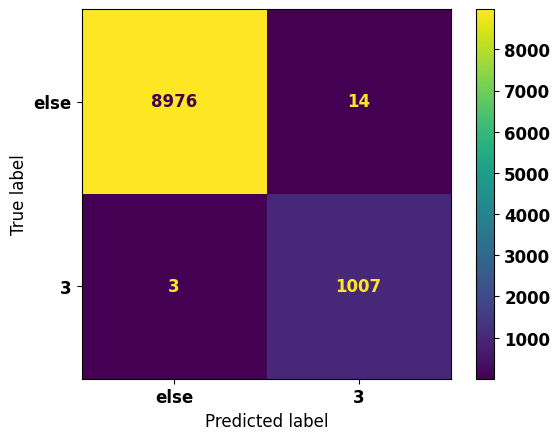

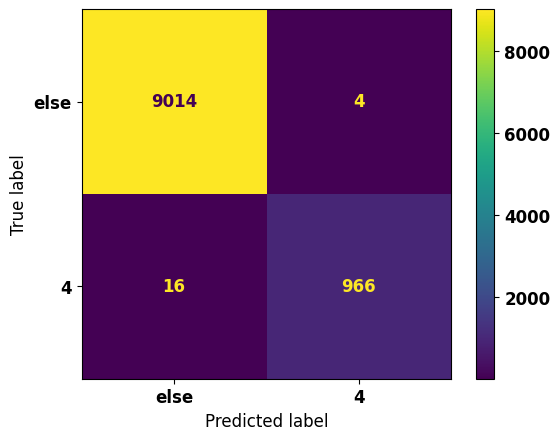

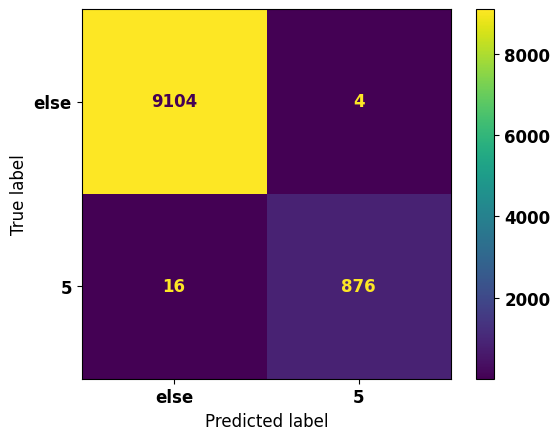

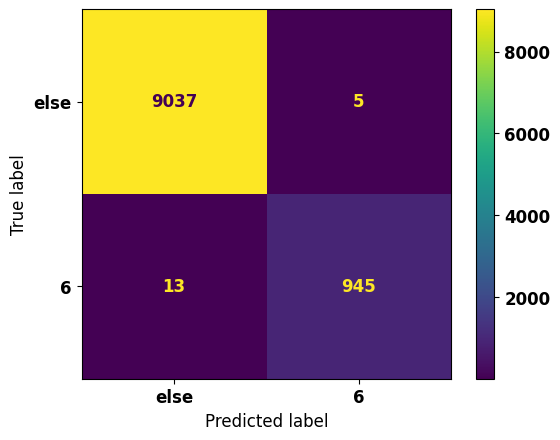

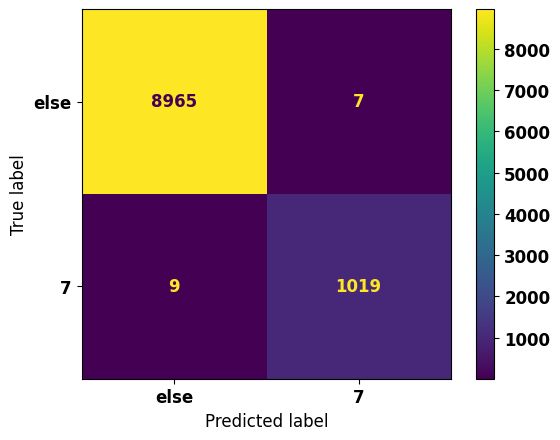

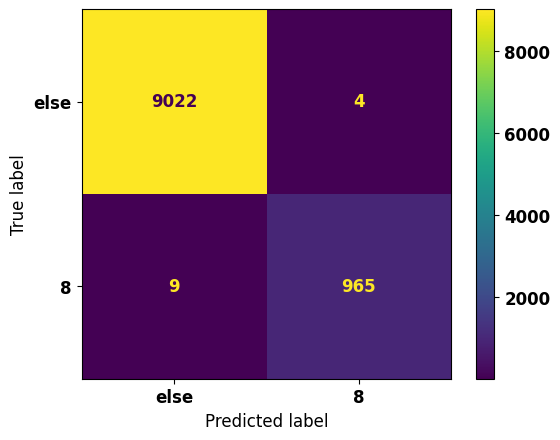

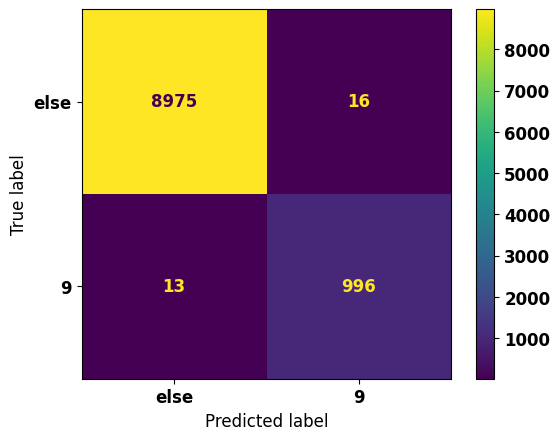

In [25]:
###################################
# Write your own code here #
predictions = np.round(model.predict(X_test_preprocessed, verbose=0))

# Compute confusion matrices for each number
cm = multilabel_confusion_matrix(y_test_encoded, predictions)

# Display confusion matrices for each number
for i in range(10):
    disp = ConfusionMatrixDisplay(cm[i], display_labels=['else', i])
    disp.plot()
###################################